<a href="https://colab.research.google.com/github/chinmay404/learning_LLM-from_scratch/blob/main/Learning_self_attention_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
inputs = np.array([
    [1.0, 0.0],  # Word 1 (like "cat")
    [0.0, 1.0]   # Word 2 (like "mat")
])
inputs

array([[1., 0.],
       [0., 1.]])

Imagine you are in a library 📚.

You are looking for a book about "cats."

There are many books on many topics.

In [ ]:
Wq = np.random.rand(2, 2)  # What you are looking for ("I want books about cats") - Vector representing your question
Wk = np.random.rand(2, 2)  # Labels of books ("this book is about cats", "this is about dogs", etc.) - Vectors describing what each input represents
Wv = np.random.rand(2, 2)  # The full book contents	- Vectors holding the useful information
l = [Wq, Wk , Wv]
for i in l:
    print(i)
    print("\n")

[[0.39781003 0.99327874]
 [0.13072175 0.92071314]]


[[0.1550261  0.91939176]
 [0.76129761 0.40050232]]


[[0.19728832 0.64182974]
 [0.08721032 0.81853335]]




You (Query) walk through the library:

You compare your Query ("cats") with every Key ("book about X") — this gives a score (how much match).

You pick the books with the highest scores.

You read the values (contents) of those books.

⚡ This is attention.
More match → More you read from that book.



In [ ]:
Q = inputs @ Wq  # (matrix multiply)
K = inputs @ Wk
V = inputs @ Wv


print("Queries:\n", Q)
print("\nKeys:\n", K)
print("\nValues:\n", V)

Queries:
 [[0.3711012  0.98602218]
 [0.18413941 0.93522626]
 [0.15743058 0.9279697 ]]

Keys:
 [[0.21565325 0.86750282]
 [0.64004331 0.50428021]
 [0.70067046 0.45239127]]

Values:
 [[0.18628052 0.6595001 ]
 [0.10922592 0.78319262]
 [0.09821812 0.80086298]]


In [ ]:
attention_scores = Q @ K.T
attention_scores

array([[0.49380038, 0.39176338],
       [0.13543566, 0.02737475]])

In [ ]:
def softmax(x):
    e_x = np.exp(x - np.max(x))  # for stability
    return e_x / e_x.sum(axis=-1, keepdims=True)

In [ ]:
attention_weights = softmax(attention_scores)
attention_weights

array([[0.52548714, 0.47451286],
       [0.52698897, 0.47301103]])

In [ ]:
output = attention_weights @ V
output

array([[0.65845566, 0.77625836],
       [0.65827452, 0.77638117]])

In [ ]:
print("Inputs:\n", inputs)
print("\nQueries:\n", Q)
print("\nKeys:\n", K)
print("\nValues:\n", V)
print("\nAttention Weights:\n", attention_weights)
print("\nOutput:\n", output)

Inputs:
 [[1. 0.]
 [0. 1.]]

Queries:
 [[0.4193949  0.61867119]
 [0.02033663 0.21688962]]

Keys:
 [[0.29739505 0.59655988]
 [0.86798706 0.04482839]]

Values:
 [[0.60122359 0.81506125]
 [0.72183586 0.73328709]]

Attention Weights:
 [[0.52548714 0.47451286]
 [0.52698897 0.47301103]]

Output:
 [[0.65845566 0.77625836]
 [0.65827452 0.77638117]]


In [ ]:
# prompt: Give me code to take Word Embeddings form Google Embedding model

import tensorflow as tf
import tensorflow_hub as hub

# Load the Google Universal Sentence Encoder model
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

# Example sentences
sentences = [
    "This is an example sentence.",
    "Each sentence is converted into a vector.",
    "This is another example."
]

# Generate embeddings
embeddings = embed(sentences)

# Print the embeddings
embeddings


<tf.Tensor: shape=(3, 512), dtype=float32, numpy=
array([[ 0.06238256,  0.02082169,  0.00380543, ..., -0.01381163,
        -0.00345576,  0.07649844],
       [-0.00154342, -0.08617748,  0.01716604, ..., -0.05106965,
         0.06750236, -0.01448431],
       [ 0.03891459,  0.01918418,  0.04246039, ..., -0.00799465,
        -0.04652746,  0.06620604]], dtype=float32)>

In [ ]:
sentences = [
    "cat sat on mat"
]

# Generate embeddings
embeddings = embed(sentences)

# Print the embeddings

print(len(embeddings[0][0]))
embeddings


TypeError: Scalar tensor has no `len()`

In [ ]:
import numpy as np

# Step 1: Real Embeddings
word_embeddings = {
    "cat": np.array([0.9, 0.1]),
    "sat": np.array([0.2, 0.8]),
    "mat": np.array([0.1, 0.9])
}

# Step 2: Put them into an input matrix
inputs = np.array([
    word_embeddings["cat"],
    word_embeddings["sat"],
    word_embeddings["mat"]
])

# Step 3: Random Weights for Q, K, V
Wq = np.random.rand(2, 2)  # 2D embeddings -> 2D queries
Wk = np.random.rand(2, 2)
Wv = np.random.rand(2, 2)

# Step 4: Make Q, K, V
Q = inputs @ Wq
K = inputs @ Wk
V = inputs @ Wv

# Step 5: Attention Scores
attention_scores = Q @ K.T

# Step 6: Softmax
def softmax(x):
    e_x = np.exp(x - np.max(x, axis=-1, keepdims=True))  # stable softmax
    return e_x / e_x.sum(axis=-1, keepdims=True)

attention_weights = softmax(attention_scores)

# Step 7: Weighted sum of Values
output = attention_weights @ V

# Show Results
print("Inputs (Real Embeddings):\n", inputs)
print("\nQueries:\n", Q)
print("\nKeys:\n", K)
print("\nValues:\n", V)
print("\nAttention Weights:\n", attention_weights)
print("\nOutput:\n", output)


Inputs (Real Embeddings):
 [[0.9 0.1]
 [0.2 0.8]
 [0.1 0.9]]

Queries:
 [[0.82283973 0.64898594]
 [0.93161463 0.81569369]
 [0.9471539  0.83950908]]

Keys:
 [[0.02962768 0.67258471]
 [0.16724168 0.69913879]
 [0.18690082 0.70293223]]

Values:
 [[0.43259567 0.54245979]
 [0.69590371 0.63081643]
 [0.73351915 0.6434388 ]]

Attention Weights:
 [[0.30301593 0.3452445  0.35173958]
 [0.29864215 0.34692522 0.35443263]
 [0.29802026 0.34716338 0.35481636]]

Output:
 [[0.62934802 0.60848275]
 [0.63060097 0.60890319]
 [0.63077915 0.60896298]]


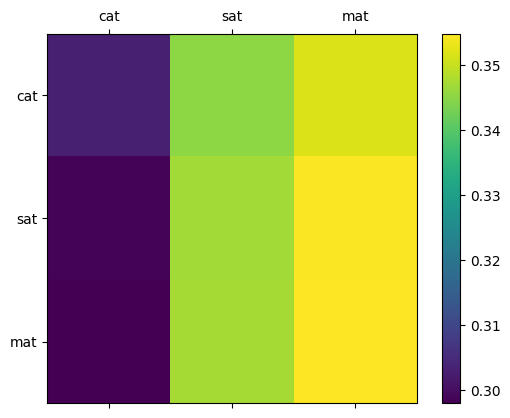

In [ ]:
import matplotlib.pyplot as plt

# Function to plot heatmap
def plot_attention_heatmap(attention, labels):
    fig, ax = plt.subplots()
    cax = ax.matshow(attention, cmap='viridis')

    ax.set_xticks(range(len(labels)))
    ax.set_yticks(range(len(labels)))
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)

    plt.colorbar(cax)
    plt.show()

# Word labels
words = ["cat", "sat", "mat"]

# Plot the attention heatmap
plot_attention_heatmap(attention_weights, words)


In [ ]:
attentio = 2 @ 2
attentio

TypeError: unsupported operand type(s) for @: 'int' and 'int'